In [1]:
import pandas as pd

In [3]:
data_path="diabetes.csv"

In [4]:
data=pd.read_csv(data_path)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.duplicated().sum()

np.int64(0)

In [12]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
data['BloodPressure']

0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 768, dtype: int64

In [14]:
bp_median=data['BloodPressure'].median()
bp_median

np.float64(72.0)

In [15]:
data['BloodPressure'].fillna(bp_median,inplace=True)


In [16]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

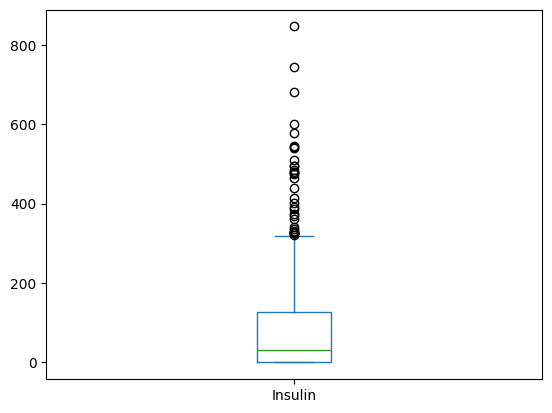

In [31]:
data['Insulin'].plot.box()

In [24]:
q1=data['Insulin'].quantile(0.25)
q3=data['Insulin'].quantile(0.75)

# insulin_iqr=q3-q1
# upper_limit= val \
#       if(val:=q3+1.5*insulin_iqr)>=data['Insulin'].max()\
#      else data['Insulin'].max()
# lower_limit=val if (val:=q1-1.5*insulin_iqr)>=0 data['Insulin'].min() else 0

# data['Insulin'].min(),lower_limit,upper_limit,data['Insulin'].max()

In [30]:
q1=data['Insulin'].quantile(0.25)
q3=data['Insulin'].quantile(0.75)

insulin_iqr=q3-q1
upper_limit= val \
    if(val:=q3+1.5*insulin_iqr) <=data['Insulin'].max()\
    else data['Insulin'].max()
lower_limit=(val
    if (val:=q1-1.5*insulin_iqr)>=data['Insulin'].min() 
    else 0)

data['Insulin'].min(),lower_limit,upper_limit,data['Insulin'].max()

(np.int64(0), 0, np.float64(318.125), np.int64(846))

In [33]:
import numpy as np

feature_insulin = data['Insulin'].to_numpy()
outliers = list(np.where(
    np.logical_or(feature_insulin > upper_limit, feature_insulin < lower_limit),
    -1,
    feature_insulin
))
outliers.count(-1)

34

In [34]:
#number of insulin values above upper limit
n_above_upper_limit=data['Insulin'][
    data['Insulin']>upper_limit
].count()

#number of insulin values below lower limit
n_below_lower_limit=data['Insulin'][
    data['Insulin']<lower_limit
].count()

n_above_upper_limit+n_below_lower_limit

np.int64(34)

In [ ]:
sum(data['Insulin']>upper_limit)

In [37]:
sum(data['Insulin']<lower_limit)

0

In [36]:
data['Insulin'][
    data['Insulin']>800
]

13    846
Name: Insulin, dtype: int64

In [39]:
data[data['Insulin']<=upper_limit]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
data=data[data['Insulin']<=upper_limit][data['Insulin']>=lower_limit]

C:\Users\atulm\AppData\Local\Temp\ipykernel_10504\4087187974.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=data[data['Insulin']<=upper_limit][data['Insulin']>=lower_limit]


In [41]:
data.shape

(734, 9)

In [42]:
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


diabetites=1-yes,2-no

In [44]:
X=data.drop('Outcome',axis=1)
y=data['Outcome']

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(
    X,y,train_size=0.8,random_state=42
)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()